In [28]:
from IPython.display import FileLink

In [29]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
%%R
library(reshape2)
library(phyloseq)
library(ggplot2)
library(plyr); library(dplyr)
library(RColorBrewer)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [5]:
%%R
workDir = '/home/chantal/Chazy/data/'
figDir = '/home/chantal/Chazy/Bulk/ITS/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/ITS/'
physeqBulk = 'bulk-core'


nprocs = 20

In [58]:
%%R

F = file.path(physeqDir, physeqBulk)

physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = prune_samples((physeq.Bulk.m$Land_Management != "PAS"),
                           physeq.Bulk)
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE) 
    
physeq.Bulk = physeq.Bulk %>% transform_sample_counts(function(x) x/sum(x))

#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2093 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2093 taxa by 7 taxonomic ranks ]


In [59]:
%%R
mdf = psmelt(physeq.Bulk)

           OTU          Sample Abundance     Full.sample Fraction PrimerF
121783  OTU.26 Sept.NTH.1.2015 0.8313000 Sept.NTH.1.2015       NA  nBITSf
364757  OTU.96       Oct.NTH.3 0.5951705       Oct.NTH.3       NA  nBITSf
147817   OTU.3       Nov.PTR.2 0.5717046       Nov.PTR.2       NA  nBITSf
167460  OTU.34    July14.PTR.4 0.5666000    July14.PTR.4       NA  nBITSf
85286  OTU.201  Oct.PTH.1.2015 0.4819194  Oct.PTH.1.2015       NA  nBITSf
6681   OTU.107       Oct.PTR.3 0.4510679       Oct.PTR.3       NA  nBITSf
       PrimerR Barcode Rev.index Fwd.index Treatment Day Pool     Experiment
121783   58A2r     136  gatctacg  gacaccgt       NTH  NA    5 Chazy.ITS.Bulk
364757   58A2r     106  cgaagtat  actatctg       NTH  NA    4 Chazy.ITS.Bulk
147817   58A2r     134  gatctacg  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk
167460   58A2r      70  actacgac  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk
85286    58A2r     155  atagtacc  tagcgagt       PTH  NA    5 Chazy.ITS.Bulk
6681     58A2r     1

In [103]:
%%R
df.l2fc = read.table("data/l2fc_Moist_allSamples.txt", sep = '\t', header = TRUE)

In [67]:
%%R
mdf.byday = ddply(mdf, .(Sample_Date, OTU), summarize, mean_day_abundance = mean(Abundance))
mdf.byday = mdf.byday[order( mdf.byday$Sample_Date, -mdf.byday$mean_day_abundance),]
mdf.Nov = subset(mdf.byday, Sample_Date == '11/26/14')
mdf.Nov$Rank = rank(-mdf.Nov$mean_day_abundance, ties.method = "random")
mdf.byday.Nov = join(mdf.byday, mdf.Nov[,c("OTU","Rank")], by = "OTU")

In [105]:
%%R
FDR = 0.10
df.l2fc.rspndr = df.l2fc %>%
    filter(padj2 <= 0.10)   

In [106]:
%%R
length(df.l2fc.rspndr$OTU)

[1] 21


In [107]:
%%R
d = left_join(df.l2fc.rspndr, mdf.byday.Nov) 

In [108]:
%%R
head(d)

  Land_Management sparsity_threshold     OTU log2FoldChange      lfcSE
1             NTH               0.45 OTU.134      -0.265424 0.06469197
2             NTH               0.45 OTU.134      -0.265424 0.06469197
3             NTH               0.45 OTU.134      -0.265424 0.06469197
4             NTH               0.45 OTU.134      -0.265424 0.06469197
5             NTH               0.45 OTU.134      -0.265424 0.06469197
6             NTH               0.45 OTU.134      -0.265424 0.06469197
          padj    Rank1         Rank2             Rank3              Rank4
1 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
2 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
3 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
4 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
5 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycetes o__Chaetothyriales
6 0.0008628047 k__Fungi p__Ascomycota c__Eurotiomycet

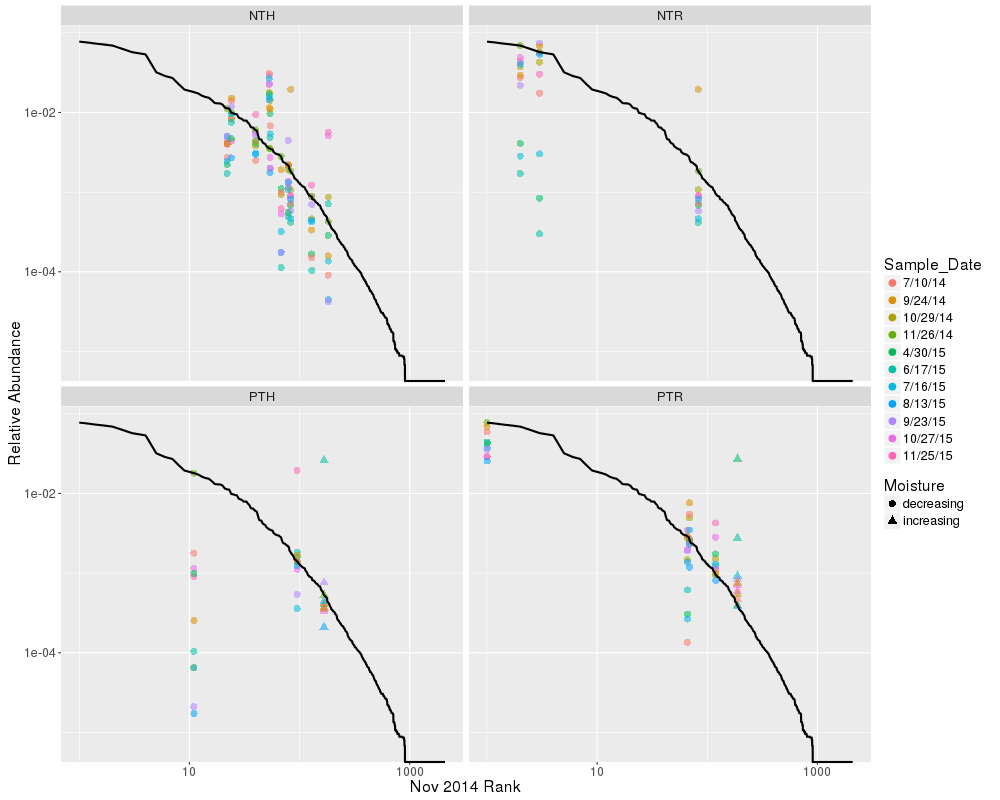

In [120]:
%%R -w 1000 -h 800
getPalette = colorRampPalette(brewer.pal(5, "Dark2"))

mdf.byday.Nov$Sample_Date = factor(mdf.byday.Nov$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

d$Sample_Date = factor(d$Sample_Date, levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))


#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = ggplot(data = mdf.byday.Nov, aes(x = Rank, y = mean_day_abundance))# + 
           # geom_line(alpha = 0.5, size = 0.5) 

p = p + geom_point(data = d, aes(fill = Sample_Date, color = Sample_Date, shape = Moisture, alpha = 0.6),
                                 size = 3)
#p = p + geom_rug(data = d.DNA, color = "blue", sides = "t", size = 1.25)

p = p + geom_line(data = subset(mdf.byday.Nov, Sample_Date == '11/26/14'), 
                  size = 1)

p = p +  scale_shape_manual(values = c(16,17))


p = p + scale_y_log10()

p = p + scale_x_log10()

p = p  + theme(text = element_text(size=16))

p = p + labs(x = "Nov 2014 Rank", y = "Relative Abundance", size = "Sample Date") +
       guides(fill= guide_legend(override.aes = list(size=3))) + facet_wrap(~Land_Management) +
        guides(alpha = FALSE)


p


In [92]:
%%R
ggsave(filename = "data/figs/Moisture_RA.png", plot = p, width =10, height =8)

In [22]:
%%R
df.l2fc.Temp = read.table('data/l2fc_Temp.txt', sep='\t', header = TRUE)

In [140]:
%%R
FDR = 0.10
df.l2fc.Temp.resp = df.l2fc.Temp %>%
    filter(padj2 <= 0.10)   

In [141]:
%%R
length(df.l2fc.Temp.resp$OTU)

[1] 43


In [142]:
%%R
d.Temp = left_join(df.l2fc.Temp.resp, mdf.byday.Nov) 

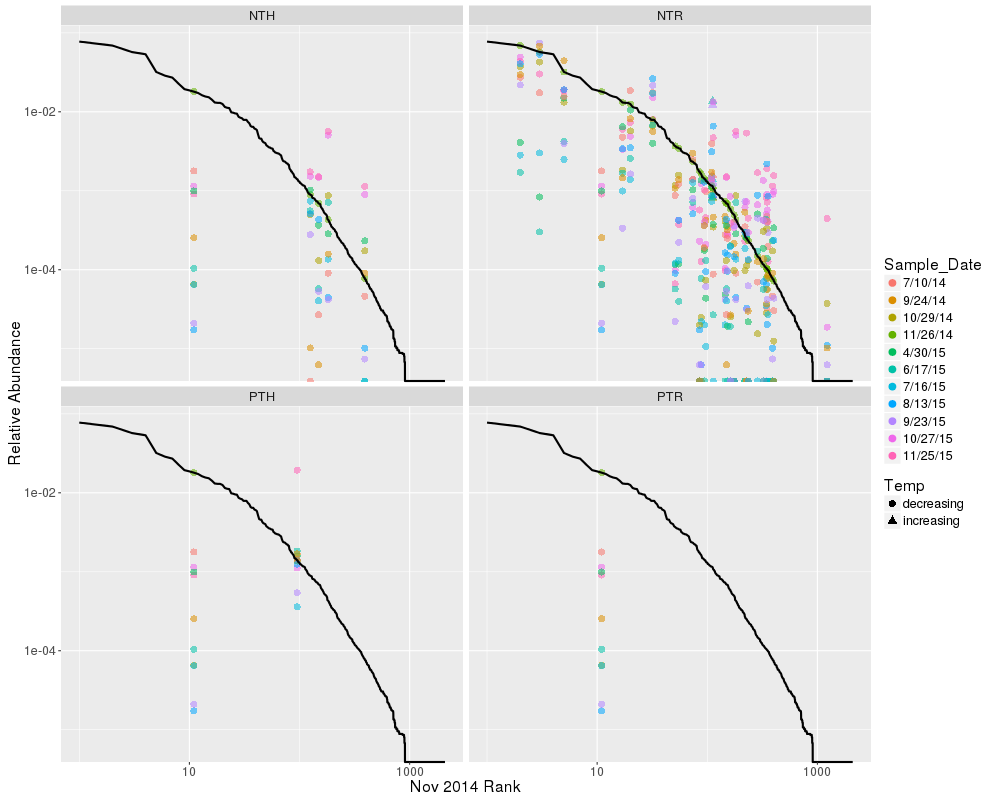

In [143]:
%%R -w 1000 -h 800
getPalette = colorRampPalette(brewer.pal(5, "Dark2"))

mdf.byday.Nov$Sample_Date = factor(mdf.byday.Nov$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

d$Sample_Date = factor(d$Sample_Date, levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))


#p = p + geom_vline(data = d.RNA, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.DNA, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = ggplot(data = mdf.byday.Nov, aes(x = Rank, y = mean_day_abundance))# + 
           # geom_line(alpha = 0.5, size = 0.5) 

p = p + geom_point(data = d.Temp, aes(fill = Sample_Date, color = Sample_Date, shape = Temp, alpha = 0.6),
                                 size = 3)
#p = p + geom_rug(data = d.DNA, color = "blue", sides = "t", size = 1.25)

p = p + geom_line(data = subset(mdf.byday.Nov, Sample_Date == '11/26/14'), 
                  size = 1)

p = p +  scale_shape_manual(values = c(16,17))


p = p + scale_y_log10()

p = p + scale_x_log10()

p = p  + theme(text = element_text(size=16))

p = p + labs(x = "Nov 2014 Rank", y = "Relative Abundance", size = "Sample Date") +
       guides(fill= guide_legend(override.aes = list(size=3))) + facet_wrap(~Land_Management) +
        guides(alpha = FALSE)

p


In [94]:
%%R
ggsave(filename = "data/figs/Temp_RA.png", plot = p, width =10, height =8)